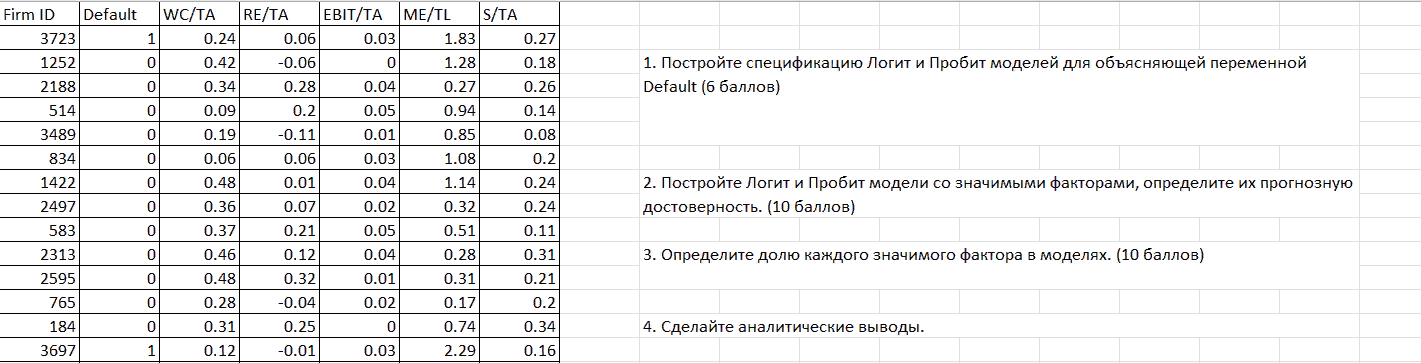

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import statsmodels.discrete.discrete_model as sm
from scipy import stats
from scipy.stats.distributions import chi2


%matplotlib inline

In [ ]:
# Данный прототип относится к вариантам [12, 16, 20, 26, 30]

VARIANT = 20

In [ ]:
df = pd.read_excel(
    'Задача экзамен ПМ20-4.xlsx',
    sheet_name='Вариант20',
    decimal=','
)
df = df.iloc[:, :8]
df

,Firm ID,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
0,2024,2018,0,-0.06,0.20,0.00,0.83,0.08
1,302,2015,0,0.26,0.01,0.05,0.46,0.22
2,2948,2013,0,0.18,0.08,0.04,0.56,0.10
3,3708,2015,1,0.28,-0.09,0.04,2.43,0.15
4,3353,2017,0,0.49,0.30,0.04,0.52,0.31
5,2142,2019,0,0.55,0.07,0.02,0.37,0.19
6,3653,2019,1,0.08,0.01,0.04,0.09,0.25
7,1679,2017,0,0.55,-0.04,0.00,0.13,0.15
8,3495,2018,0,0.31,0.01,0.05,0.46,0.26
9,275,2012,0,0.30,0.04,0.05,0.51,0.23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Firm ID  60 non-null     int64  
 1   Year     60 non-null     int64  
 2   Default  60 non-null     int64  
 3   WC/TA    60 non-null     float64
 4   RE/TA    60 non-null     float64
 5   EBIT/TA  60 non-null     float64
 6   ME/TL    60 non-null     float64
 7   S/TA     60 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 3.9 KB


Проверим на наличие пропусков

In [ ]:
df.isna().sum()

Firm ID    0
Year       0
Default    0
WC/TA      0
RE/TA      0
EBIT/TA    0
ME/TL      0
S/TA       0
dtype: int64

Пропусков нет

## Задание №1. Спецификация

**Постройте спецификацию Логит и Пробит моделей для объясняющей переменной Default (6 баллов)**
<br>
<br>

Переменные в датасете:

**WC** = Working Capital

**RE** = Retained Earnings

**EBIT/TA** = Earnings Before Interest and Taxes divided by Total Assets

**ME/TL** = Market Value of Equity divided by Total Liabilities

**S/TA** = Sales divided by Total Assets

In [ ]:
df1 = df[df['Default'] == 1]
df1.groupby('Year')['Default'].count()

Year
2013    1
2015    2
2019    1
Name: Default, dtype: int64

In [ ]:
df['Default'].value_counts()

0    56
1     4
Name: Default, dtype: int64

In [ ]:
df.groupby('Year')['Default'].count()

Year
2012     6
2013     4
2014     6
2015     9
2016     4
2017    12
2018     8
2019     6
2020     5
Name: Default, dtype: int64

In [ ]:
df.groupby('Year').mean()

,Firm ID,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
Year,,,,,,,
2012,1569.166667,0.000000,0.243333,0.146667,0.025000,0.683333,0.253333
2013,2876.750000,0.250000,0.295000,0.015000,0.027500,0.852500,0.180000
2014,2150.333333,0.000000,0.146667,0.131667,0.031667,0.715000,0.221667
2015,1964.666667,0.222222,0.184444,0.021111,0.027778,1.266667,0.194444
2016,1398.000000,0.000000,0.320000,0.072500,0.030000,0.687500,0.290000
2017,1623.916667,0.000000,0.384167,0.119167,0.025000,0.753333,0.242500
2018,2150.125000,0.000000,0.215000,0.125000,0.032500,0.777500,0.222500
2019,2568.166667,0.166667,0.260000,0.073333,0.023333,0.836667,0.186667
2020,1966.000000,0.000000,0.348000,0.028000,0.026000,0.726000,0.228000


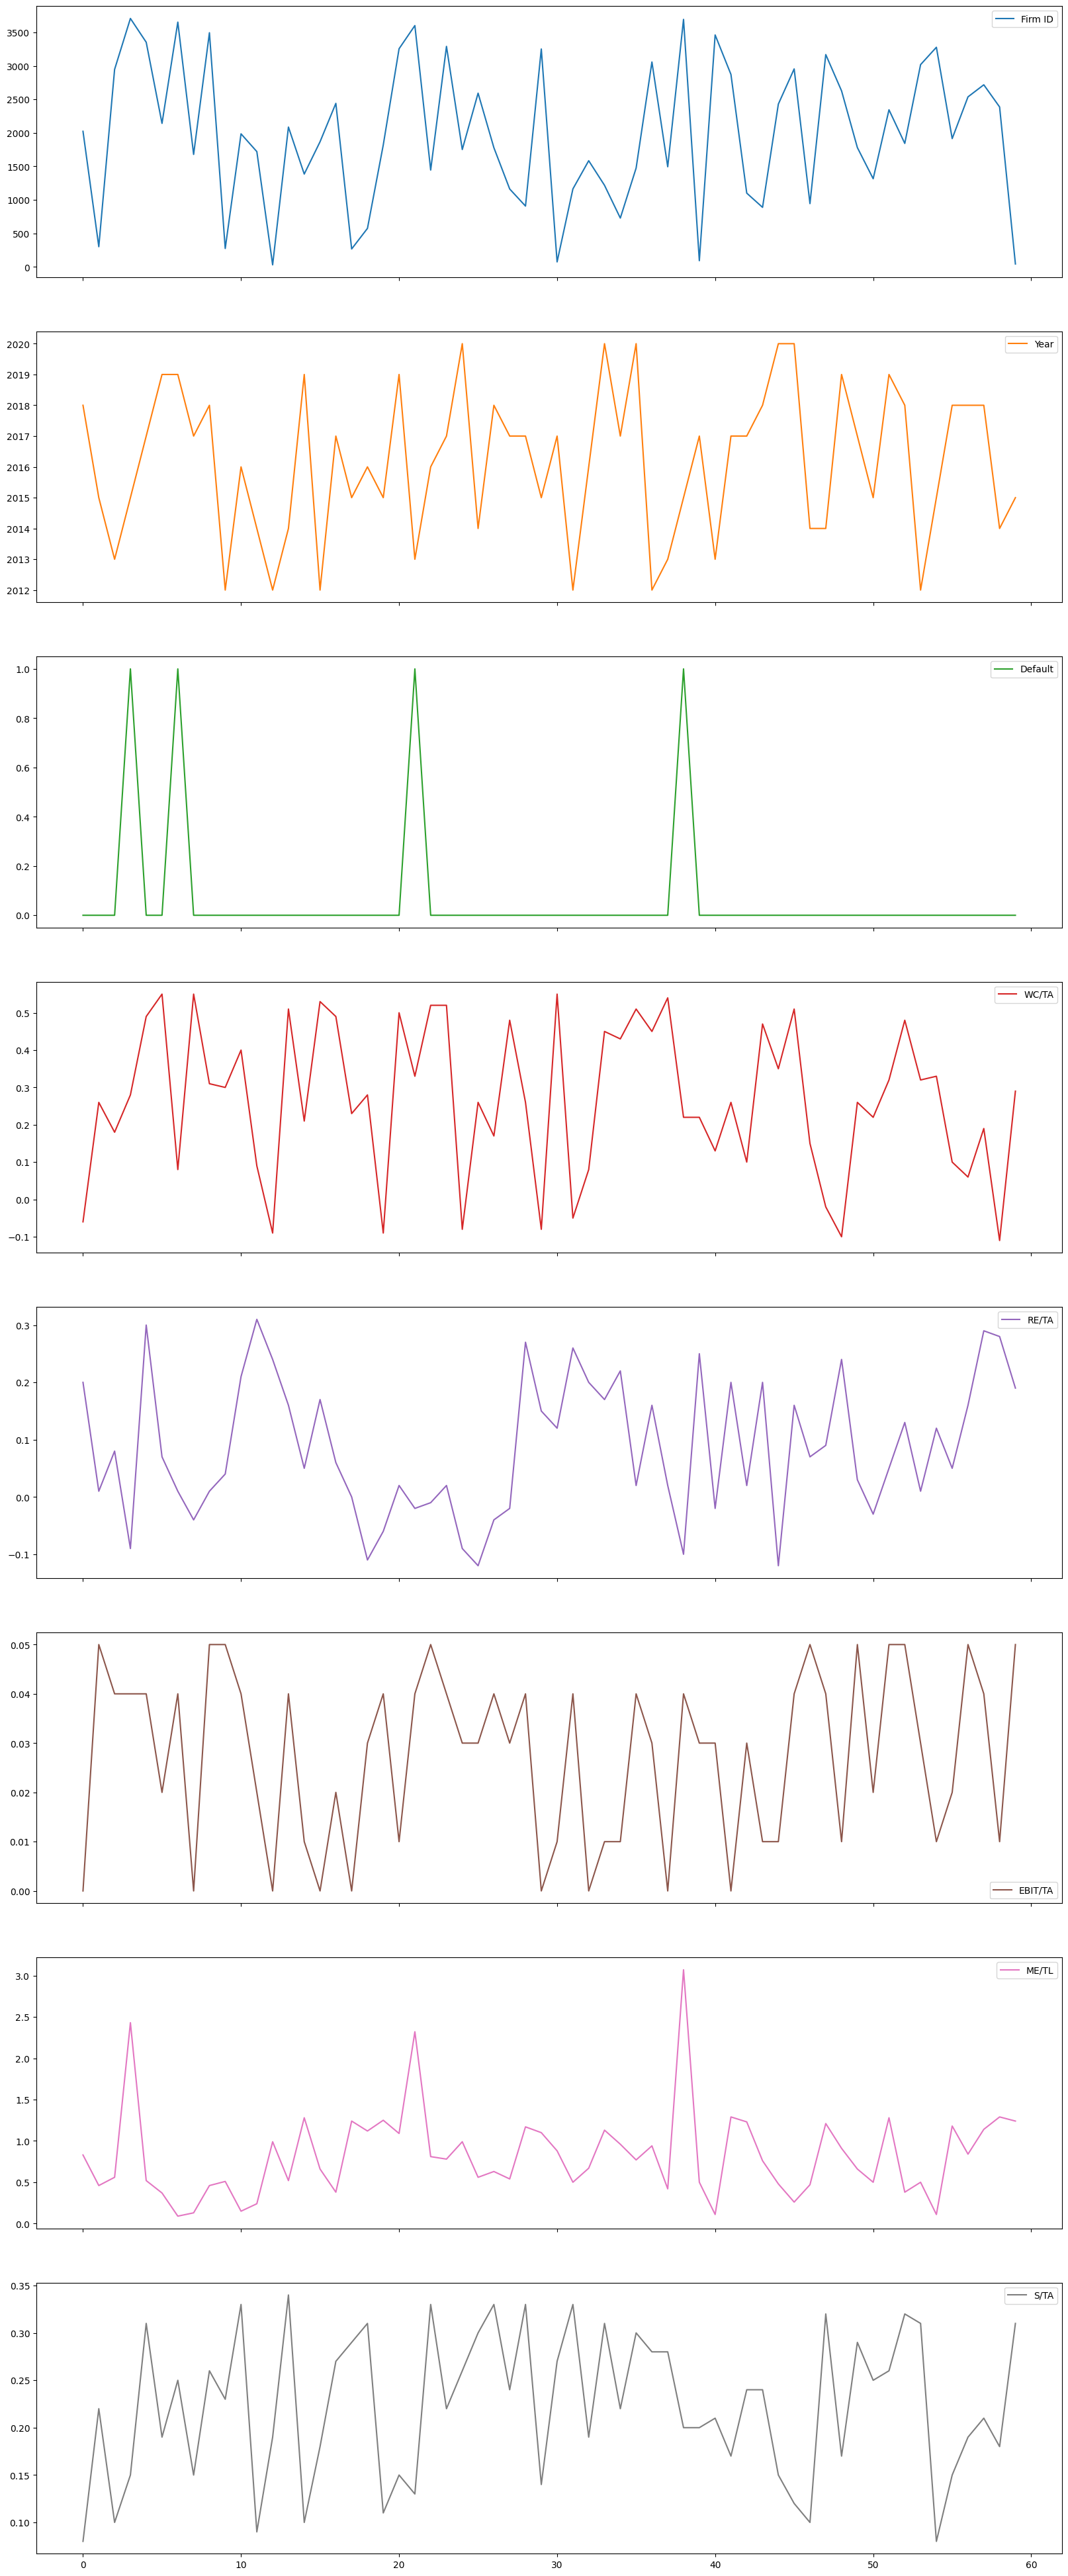

In [ ]:
# смотрим на график
df.plot(figsize=(20, 50), subplots=True)
plt.show()

Firm ID не влияет на модель, поэтому удаляем этот столбец

In [ ]:
df = df.drop(columns=['Firm ID'])
df.head()

,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
0,2018,0,-0.06,0.20,0.00,0.83,0.08
1,2015,0,0.26,0.01,0.05,0.46,0.22
2,2013,0,0.18,0.08,0.04,0.56,0.10
3,2015,1,0.28,-0.09,0.04,2.43,0.15
4,2017,0,0.49,0.30,0.04,0.52,0.31


Построим корреляционную матрицу

In [ ]:
df.corr()

,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
Year,1.000000,-0.072800,0.155066,-0.055465,-0.019194,-0.038846,-0.025088
Default,-0.072800,1.000000,-0.053904,-0.308341,0.193282,0.562630,-0.144550
WC/TA,0.155066,-0.053904,1.000000,-0.129146,0.044117,-0.202150,0.278432
RE/TA,-0.055465,-0.308341,-0.129146,1.000000,-0.183112,-0.165096,-0.032893
EBIT/TA,-0.019194,0.193282,0.044117,-0.183112,1.000000,0.028594,0.347931
ME/TL,-0.038846,0.562630,-0.202150,-0.165096,0.028594,1.000000,-0.107572
S/TA,-0.025088,-0.144550,0.278432,-0.032893,0.347931,-0.107572,1.000000


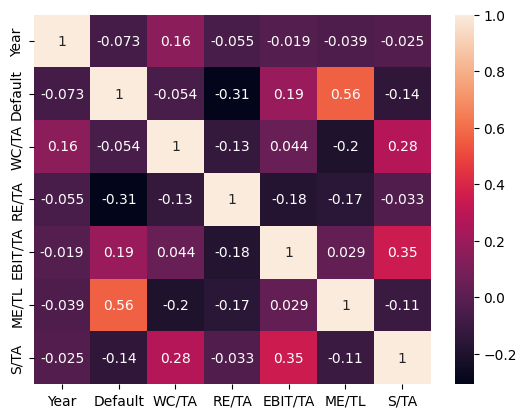

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Year и WC/TA имеют слабую связь с эндогенной переменной - Default, следовательно, удалим их из рассмотрения

In [ ]:
df = df.drop(columns=['Year', 'WC/TA'])
df.head()

,Default,RE/TA,EBIT/TA,ME/TL,S/TA
0,0,0.20,0.00,0.83,0.08
1,0,0.01,0.05,0.46,0.22
2,0,0.08,0.04,0.56,0.10
3,1,-0.09,0.04,2.43,0.15
4,0,0.30,0.04,0.52,0.31


Таким образом, полученная спецификация имеет вид:

**Yt = a1*(RE/TA)	+ a2*(EBIT/TA) + a3*(ME/TL)	+ a4*(S/TA) + ut**

# Задание 2. Модели Логит-Пробит

**Постройте Логит и Пробит модели со значимыми факторами, определите их прогнозную достоверность. (10 баллов)**

## Отбор факторов

Разделим выборку на обучающую и тестовую

In [ ]:
Y = df['Default']
X = df.drop(columns=['Default'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Logit-модель
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.152138
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                   48
Model:                          Logit   Df Residuals:                       44
Method:                           MLE   Df Model:                            3
Date:                Wed, 13 Sep 2023   Pseudo R-squ.:                  0.3493
Time:                        18:35:03   Log-Likelihood:                -7.3026
converged:                       True   LL-Null:                       -11.222
Covariance Type:            nonrobust   LLR p-value:                   0.04947
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RE/TA        -17.5746     11.307     -1.554      0.120     -39.737       4.588
EBIT/TA       26.0633     46.

Находим Хи-квадрат табличное для альфа = 0.05 и степеней свободы = 4

In [ ]:
chi2.ppf(0.05, df=4)

0.7107230213973239

Сравниваем с z.

Если Zрасч > Zтабл, то коэффициент признается значимым

Zрасч(RE/TA) > Zтабл => коэффициент значим

Zрасч(EBIT/TA) < Zтабл => коэффициент не значим

Zрасч(ME/TL) < Zтабл => коэффициент не значим

Zрасч(S/TA) > Zтабл => коэффициент значим

In [ ]:
#Probit
probit = sm.Probit(y_train, X_train)
probit_model = probit.fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.155538
         Iterations 9
                          Probit Regression Results                           
Dep. Variable:                Default   No. Observations:                   48
Model:                         Probit   Df Residuals:                       44
Method:                           MLE   Df Model:                            3
Date:                Wed, 13 Sep 2023   Pseudo R-squ.:                  0.3347
Time:                        18:35:10   Log-Likelihood:                -7.4658
converged:                       True   LL-Null:                       -11.222
Covariance Type:            nonrobust   LLR p-value:                   0.05724
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RE/TA        -10.0384      6.357     -1.579      0.114     -22.498       2.421
EBIT/TA       19.0859     25.

Не значимы те же факторы, поэтому исключим их

In [ ]:
df = df.drop(columns=['EBIT/TA', 'ME/TL'])

Повтором все тоже самое после удаления

In [ ]:
Y = df['Default']
X = df.drop(columns=['Default'])

In [ ]:
# делим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Logit-модель
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.194687
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                   48
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Sep 2023   Pseudo R-squ.:                  0.3213
Time:                        18:35:21   Log-Likelihood:                -9.3450
converged:                       True   LL-Null:                       -13.768
Covariance Type:            nonrobust   LLR p-value:                  0.002937
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RE/TA        -18.7921      8.645     -2.174      0.030     -35.736      -1.848
S/TA         -10.5052      3.

In [ ]:
chi2.ppf(0.05, df=2)

0.10258658877510106

Eсли Zрасч > Zтабл, то коэффициент признается значимым

Zрасч(RE/TA) > Zтабл => коэффициент значим

Zрасч(S/TA) > Zтабл => коэффициент значим

Псевдо R2 не является достаточно хорошим, так как его значение не велико.

In [ ]:
#Probit
probit = sm.Probit(y_train, X_train)
probit_model = probit.fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.193129
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:                Default   No. Observations:                   48
Model:                         Probit   Df Residuals:                       46
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Sep 2023   Pseudo R-squ.:                  0.3267
Time:                        18:35:27   Log-Likelihood:                -9.2702
converged:                       True   LL-Null:                       -13.768
Covariance Type:            nonrobust   LLR p-value:                  0.002706
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RE/TA        -10.4635      4.820     -2.171      0.030     -19.911      -1.016
S/TA          -5.8813      1.

Если Zрасч > Zтабл, то коэффициент признается значимым

Zрасч(RE/TA) > Zтабл => коэффициент значим

Zрасч(S/TA) > Zтабл => коэффициент значим

## Вычислим прогноз

In [ ]:
# Logit-модель (из библиотеки sklearn)
logit2 = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
logreg = logit2.fit(X_train, y_train)

print("Real    :", y_test.to_numpy())
print("Predict :", logreg.predict(X_test))
print()

confusion_matrix(y_test, logreg.predict(X_test))

Real    : [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Predict : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]



array([[14,  0],
       [ 1,  0]])

In [ ]:
"""
Confussion matrix:

true_negative    true_positive
false_negative   false_positive
"""

'\nConfussion matrix:\n\ntrue_negative    true_positive\nfalse_negative   false_positive\n'

In [ ]:
right_pred = []
iter = 10
while len(right_pred) < iter:
  X_train, X_test, y_train, y_test = train_test_split(X, Y)
  logreg = logit2.fit(X_train, y_train)
  confussion = confusion_matrix(y_test, logreg.predict(X_test))
  if len(confussion) == 2:
    percent = (confussion[0][0] + confussion[0][1]) / len(y_test)
    right_pred.append(percent)

In [ ]:
# Доля правильно предсказанных значений Yt при 10 итерациях
# разделения выборки на обучающую и тестовую
right_pred

[0.8,
 0.8666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.9333333333333333]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [ ]:
arr = np.insert(X_test.to_numpy(), 0, np.ones(X_test.shape[0]), axis=1)
arr

array([[ 1.  , -0.09,  0.26],
       [ 1.  ,  0.17,  0.31],
       [ 1.  ,  0.16,  0.28],
       [ 1.  ,  0.16,  0.19],
       [ 1.  , -0.04,  0.33],
       [ 1.  ,  0.2 ,  0.17],
       [ 1.  ,  0.01,  0.22],
       [ 1.  ,  0.03,  0.29],
       [ 1.  ,  0.25,  0.2 ],
       [ 1.  ,  0.05,  0.1 ],
       [ 1.  ,  0.31,  0.09],
       [ 1.  ,  0.26,  0.33],
       [ 1.  ,  0.2 ,  0.19],
       [ 1.  ,  0.09,  0.32],
       [ 1.  ,  0.29,  0.21]])

Вывод предсказнного значения и истинного Y для probit_model

In [ ]:
pred_test = probit_model.predict(arr[:,1:]).reshape(-1, 1)

df_pred = pd.DataFrame(y_test.values.reshape(-1, 1), columns=['Y'])
df_pred['pred'] = pred_test
df_pred

,Y,pred
0,0,0.278461
1,0,0.000158
2,0,0.000449
3,0,0.002622
4,0,0.063969
5,0,0.000992
6,0,0.080979
7,0,0.021719
8,0,0.000075
9,0,0.133220


# Задание 3. Значимость факторов

**Определите долю каждого значимого фактора в моделях. (10 баллов)**

In [ ]:
print(probit_model.summary())

                          Probit Regression Results                           
Dep. Variable:                Default   No. Observations:                   48
Model:                         Probit   Df Residuals:                       46
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Sep 2023   Pseudo R-squ.:                  0.3267
Time:                        18:36:20   Log-Likelihood:                -9.2702
converged:                       True   LL-Null:                       -13.768
Covariance Type:            nonrobust   LLR p-value:                  0.002706
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RE/TA        -10.4635      4.820     -2.171      0.030     -19.911      -1.016
S/TA          -5.8813      1.730     -3.400      0.001      -9.271      -2.491

Possibly complete quasi-separation: A fraction 0.17

In [ ]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                   48
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Sep 2023   Pseudo R-squ.:                  0.3213
Time:                        18:36:24   Log-Likelihood:                -9.3450
converged:                       True   LL-Null:                       -13.768
Covariance Type:            nonrobust   LLR p-value:                  0.002937
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RE/TA        -18.7921      8.645     -2.174      0.030     -35.736      -1.848
S/TA         -10.5052      3.442     -3.052      0.002     -17.251      -3.759


Спецификация моделей:

Yt = a1(RE/TA) + a2(S/TA) + ut

Для Логит:
Yt = -15.8357(RE/TA) - 12.5982(S/TA) + ut
Наибольший вклад у RE/TA, наименьший у S/TA

Для Пробит:
Yt = -8.3523(RE/TA) - 6.8374(S/TA) + ut
Наибольший вклад у RE/TA, наименьший у S/TA

# Задание 4. Аналитические выводы

**Сделайте аналитические выводы. (4 балла)**

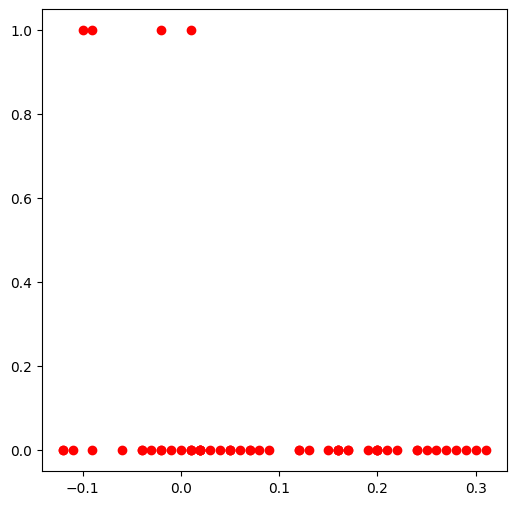

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(df['RE/TA'], df['Default'],'ro')
plt.show()

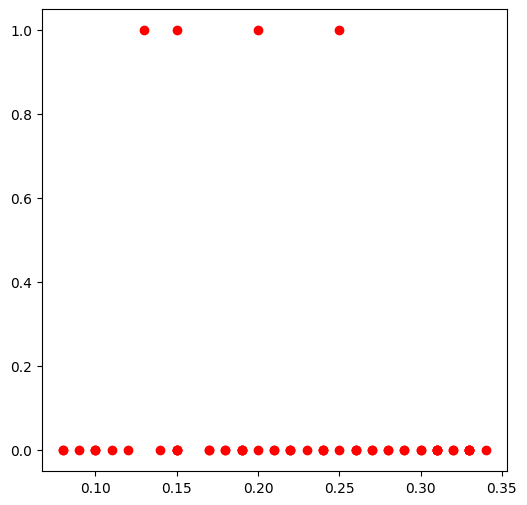

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(df['S/TA'], df['Default'],'ro')
plt.show()

Можем заметить, что по резльтутатам построения на Default вляют только 2 переменные из возможных 7, при этом, судя по результатам псевдо-R, модель требует доработки и рассмотрения, возможно, еще каких-нибудь факторов. Но прогнозируемые значения --- в результате.

К сожалению, расшифровки мы не видим для наших регрессоров, их наличие помогло бы нам провести анализ более детально.

Также мы наблюдаем не самые сбалансированные данные. Из 60 наблюдений только при 4 эндогенная переменная принемает значение 1. Значит, прогноз скорее всего всегда будет хорошим при любом делении, тк при ошибка поставить 0 вместо 1 будет маленькой. Смотря на распределение признаков, одназначно вынести вердикт, какие должны быть значения, чтобы был объявлен дефолт, нельзя.

# Аналитическая выноска

1) Изначальная специфиакация: Yt = a1(RE/TA) + a2(EBIT/TA) + a3(ME/TL) + a4(S/TA) + ut

При этом из первоначальных данных мы удалили 3 столбца из-за их малого влияния на эндогенную переменную, такой вывод сделан на основе корреляционной матрицы

2) Сначала построили для Логит-модели и проверили коэффициенты на значимость при помощи Хи-квадрат

Zтабл = 0.7107230213973239

Zрасч(RE/TA)=1.536 > Zтабл => коэффициент значим

Zрасч(EBIT/TA)=0.571 < Zтабл => коэффициент не значим

Zрасч(ME/TL)=0.582 < Zтабл => коэффициент не значим

Zрасч(S/TA)=2.364 > Zтабл => коэффициент значим

Также строим для Пробит модели:

Zрасч(RE/TA)=1.557 > Zтабл => коэффициент значим

Zрасч(EBIT/TA)=0.710 < Zтабл => коэффициент не значим

Zрасч(ME/TL)=0.282 < Zтабл => коэффициент не значим

Zрасч(S/TA)=2.405 > Zтабл => коэффициент значим

Далее удалили незначимые регрессоры и построили заново

Zтабл = 0.10258658877510106

Для Логит модели:

Zрасч(RE/TA)=1.697 > Zтабл => коэффициент значим

Zрасч(S/TA)=3.369 > Zтабл => коэффициент значим

Для Пробит модели:

Zрасч(RE/TA)=1.726 > Zтабл => коэффициент значим

Zрасч(S/TA)=3.969 > Zтабл => коэффициент значим

И тд и тп по каждому пункту